In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten,Activation,Dense,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras.models import Model
import cv2                 # working with, mainly resizing, images
import numpy as np         # dealing with arrays
import os                  # dealing with directories
from random import shuffle # mixing up or currently ordered data that might lead our network astray in training.
from tqdm import tqdm      # a nice pretty percentage bar for tasks. \
import matplotlib.pyplot as plt
import time 

TRAIN_DIR ='/kaggle/input/plantdisease/PlantVillage'#path of dataset
IMG_SIZE =128
input_shape=(IMG_SIZE,IMG_SIZE,3)

In [2]:
def label_imgv2(word_label):
    if word_label == 'Pepper__bell___Bacterial_spot': return 0
    elif word_label == 'Pepper__bell___healthy': return 1
    elif word_label == 'Potato___Early_blight': return 2
    elif word_label == 'Potato___healthy': return 3
    elif word_label == 'Potato___Late_blight': return 4
    elif word_label == 'Tomato__Target_Spot': return 5
    elif word_label == 'Tomato__Tomato_mosaic_virus': return 6
    elif word_label == 'Tomato__Tomato_YellowLeaf__Curl_Virus': return 7
    elif word_label == 'Tomato_Bacterial_spot': return 8
    elif word_label == 'Tomato_Early_blight': return 9
    elif word_label == 'Tomato_healthy': return 10
    elif word_label == 'Tomato_Late_blight': return 11
    elif word_label == 'Tomato_Leaf_Mold': return 12
    elif word_label == 'Tomato_Septoria_leaf_spot': return 13
    elif word_label == 'Tomato_Spider_mites_Two_spotted_spider_mite': return 14

def create_train_data():
    training_data = []
    
    for folder in os.listdir(TRAIN_DIR):
        i=0
        for img in os.listdir(TRAIN_DIR+"/"+folder):
            i+=1
            path = os.path.join(TRAIN_DIR+"/"+folder,img)
            
            try:
                label = label_imgv2(folder)
                img = cv2.imread(path,cv2.IMREAD_COLOR)
                img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
                training_data.append([np.array(img),np.array(label)])
            
            except:
                print(path)
            if i==500:
                break

    shuffle(training_data)
    return training_data

train_data = create_train_data()

In [3]:
os.listdir('/kaggle/input/plantdisease/PlantVillage/')

['Pepper__bell___Bacterial_spot',
 'Potato___healthy',
 'Tomato_Leaf_Mold',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato_Bacterial_spot',
 'Tomato_Septoria_leaf_spot',
 'Tomato_healthy',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato_Early_blight',
 'Tomato__Target_Spot',
 'Pepper__bell___healthy',
 'Potato___Late_blight',
 'Tomato_Late_blight',
 'Potato___Early_blight',
 'Tomato__Tomato_mosaic_virus']

In [4]:
train_y=np.array([i[1] for i in train_data])
train_x=np.array([i[0] for i in train_data]).reshape(-1,IMG_SIZE,IMG_SIZE,3)

train_x.shape

(7025, 128, 128, 3)

In [5]:
train_x=train_x/255
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,test_size=0.2)

In [6]:
train_datagen = ImageDataGenerator(zoom_range=0.1, rotation_range=50,
                                   width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator()
train_generator = train_datagen.flow(x_train, y_train, batch_size=32)
val_generator = val_datagen.flow(x_test, y_test, batch_size=20)

In [7]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', 
                 input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(15, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      504       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        244       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        3

In [8]:
custom=model.fit(x_train,y_train,epochs=20,batch_size=64,validation_data=(x_test,y_test))

Epoch 1/20
88/88 [==============================] - 3s 38ms/step - loss: 2.2019 - accuracy: 0.3014 - val_loss: 2.8712 - val_accuracy: 0.0641
Epoch 2/20
88/88 [==============================] - 3s 31ms/step - loss: 1.3554 - accuracy: 0.5692 - val_loss: 4.0023 - val_accuracy: 0.1046
Epoch 3/20
88/88 [==============================] - 3s 30ms/step - loss: 0.9541 - accuracy: 0.6792 - val_loss: 5.0265 - val_accuracy: 0.1359
Epoch 4/20
88/88 [==============================] - 3s 30ms/step - loss: 0.7662 - accuracy: 0.7464 - val_loss: 4.8600 - val_accuracy: 0.1630
Epoch 5/20
88/88 [==============================] - 3s 30ms/step - loss: 0.6456 - accuracy: 0.7843 - val_loss: 3.4761 - val_accuracy: 0.2356
Epoch 6/20
88/88 [==============================] - 3s 30ms/step - loss: 0.5082 - accuracy: 0.8365 - val_loss: 1.1796 - val_accuracy: 0.6021
Epoch 7/20
88/88 [==============================] - 3s 31ms/step - loss: 0.4656 - accuracy: 0.8434 - val_loss: 0.7332 - val_accuracy: 0.7445
Epoch 8/20
88

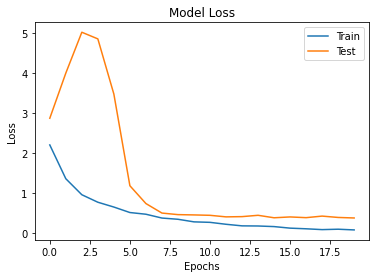

In [9]:
plt.plot(custom.history['loss'])
plt.plot(custom.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

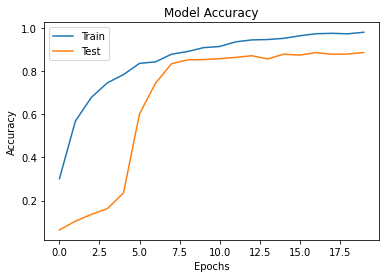

In [10]:
plt.plot(custom.history['accuracy'])
plt.plot(custom.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

In [11]:
predictions = model.predict(x_test)
predictions

array([[7.3101642e-06, 1.9192639e-04, 4.6113382e-06, ..., 1.6114413e-03,
        7.8439152e-05, 2.7902192e-04],
       [4.8544700e-07, 1.3481302e-07, 2.9116075e-06, ..., 1.0362689e-05,
        6.1450969e-06, 1.7959060e-02],
       [1.4721852e-06, 2.6718728e-05, 5.7182605e-09, ..., 1.0110064e-05,
        2.1474629e-05, 6.3232549e-02],
       ...,
       [2.0098001e-07, 2.3725802e-06, 1.1953815e-06, ..., 8.5372440e-06,
        5.4826720e-05, 2.5353082e-03],
       [1.0041104e-05, 1.0041692e-06, 7.1179688e-06, ..., 6.1287355e-05,
        8.4181367e-05, 9.8692733e-01],
       [1.3108998e-05, 1.1011996e-07, 4.6518160e-04, ..., 1.7793475e-06,
        3.0470062e-05, 1.4385622e-04]], dtype=float32)

In [12]:
y_preds = [np.argmax(i) for i in predictions]

In [13]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_preds))
print(metrics.classification_report(y_test,y_preds))

[[ 83   8   3   0   0   0   0   4   2   2   0   2   0   1   0]
 [  1  96   0   0   0   0   0   0   0   0   0   0   0   1   0]
 [  1   0  81   0   4   0   0   0   0   0   0   1   0   0   0]
 [  0   2   0  21   1   0   0   1   0   0   0   0   1   0   0]
 [  0   0   0   0 102   0   0   0   2   2   0   1   1   0   0]
 [  0   0   0   0   2  89   0   0   2   2   1   1   0   1  10]
 [  0   0   0   0   0   0  75   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 104   1   4   0   1   0   0   1]
 [  1   1   0   0   0   0   0   0  84   2   0   2   0   0   0]
 [  0   1   0   0   4   2   0   2   3  77   0   3   0   1   3]
 [  0   0   0   0   0   1   0   0   0   0 102   0   0   0   0]
 [  1   1   4   0   5   2   0   0   1  10   0  84   2   0   0]
 [  0   0   0   0   2   0   0   0   0   2   0   0 100   1   0]
 [  1   1   3   0   1   1   3   2   1   4   0   0   6  58   2]
 [  0   1   0   0   1   6   0   1   0   1   0   0   0   0  90]]
              precision    recall  f1-score   support


In [14]:
custom = model.fit_generator(train_generator, epochs=50, validation_data=val_generator, verbose=1)

Epoch 1/50
176/176 [==============================] - 22s 123ms/step - loss: 0.9083 - accuracy: 0.7116 - val_loss: 0.5643 - val_accuracy: 0.8078
Epoch 2/50
176/176 [==============================] - 21s 121ms/step - loss: 0.6793 - accuracy: 0.7721 - val_loss: 0.9455 - val_accuracy: 0.7068
Epoch 3/50
176/176 [==============================] - 22s 123ms/step - loss: 0.5814 - accuracy: 0.8037 - val_loss: 0.6993 - val_accuracy: 0.7658
Epoch 4/50
176/176 [==============================] - 21s 122ms/step - loss: 0.5165 - accuracy: 0.8281 - val_loss: 0.4793 - val_accuracy: 0.8299
Epoch 5/50
176/176 [==============================] - 22s 125ms/step - loss: 0.4863 - accuracy: 0.8345 - val_loss: 0.5585 - val_accuracy: 0.8142
Epoch 6/50
176/176 [==============================] - 21s 120ms/step - loss: 0.4752 - accuracy: 0.8370 - val_loss: 0.4186 - val_accuracy: 0.8626
Epoch 7/50
176/176 [==============================] - 22s 123ms/step - loss: 0.4348 - accuracy: 0.8495 - val_loss: 0.5059 - val_ac

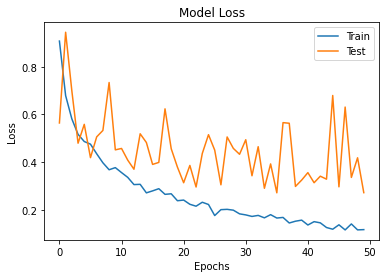

In [15]:
plt.plot(custom.history['loss'])
plt.plot(custom.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

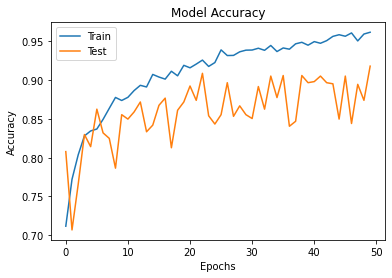

In [16]:
plt.plot(custom.history['accuracy'])
plt.plot(custom.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

In [17]:
predictions = model.predict(x_test)
y_preds = [np.argmax(i) for i in predictions]

In [18]:
print(metrics.confusion_matrix(y_test,y_preds))
print(metrics.classification_report(y_test,y_preds))

[[100   3   1   0   0   0   0   0   0   1   0   0   0   0   0]
 [  0  98   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  86   1   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  26   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   3   3  95   0   0   0   0   6   0   0   0   0   1]
 [  0   2   0   2   0  82   0   0   1   3   8   0   0   0  10]
 [  0   0   0   0   0   0  75   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0 108   1   0   0   0   0   0   1]
 [  0   0   0   0   0   1   0   0  87   1   0   1   0   0   0]
 [  0   2   0   0   0   0   0   1   0  90   0   1   0   2   0]
 [  0   0   0   0   0   0   0   0   0   0 103   0   0   0   0]
 [  1   3   1   1   2   2   0   1   0   7   0  88   1   2   1]
 [  0   0   0   0   0   0   0   0   0   1   0   0  99   4   1]
 [  2   1   1   0   0   0   0   2   1   1   0   0   1  74   0]
 [  0   0   0   0   0   2   2   1   0   5  11   0   0   0  79]]
              precision    recall  f1-score   support


In [19]:
classes = ['Pepper__bell___Bacterial_spot','Pepper__bell___healthy','Potato___Early_blight','Potato___healthy',
           'Potato___Late_blight','Tomato__Target_Spot','Tomato__Tomato_mosaic_virus','Tomato__Tomato_YellowLeaf__Curl_Virus',
           'Tomato_Bacterial_spot','Tomato_Early_blight','Tomato_healthy','Tomato_Late_blight','Tomato_Leaf_Mold',
           'Tomato_Septoria_leaf_spot','Tomato_Spider_mites_Two_spotted_spider_mite']

Let us test any random image from the dataset

Tomato_Septoria_leaf_spot


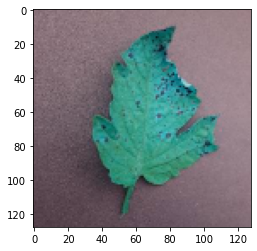

In [20]:
plt.imshow(train_x[100])
plt.show
print(classes[train_y[100]])

In [21]:
from tensorflow.keras.preprocessing import image
test=train_x[100]
test=image.img_to_array(test)
test=test.reshape((-1,IMG_SIZE,IMG_SIZE,3))
predictions = model.predict(test)
predictions

array([[6.6287981e-07, 8.5684203e-12, 2.7137613e-12, 9.6648275e-14,
        2.4824399e-11, 8.4509476e-11, 2.5923567e-11, 3.2609976e-14,
        4.0249754e-10, 7.9099249e-15, 4.3715843e-11, 3.9485055e-09,
        1.4228426e-07, 9.9999917e-01, 9.0808250e-10]], dtype=float32)

In [22]:
classes[np.argmax(predictions)]

'Tomato_Septoria_leaf_spot'